In [63]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [64]:
df = pd.read_csv('data.csv')

In [65]:
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14.0,NaN,NaN,42.0,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14.0,NaN,NaN,52.0,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,50-99,Pvt Ltd,44.0,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,0.0,500-999,Pvt Ltd,97.0,0.0


In [66]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index     479
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
training_hours             766
target                       0
dtype: int64

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  18679 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  float64
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  training_hours          18392 non-null  float64
 12  target                  19158 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usage: 1.9+ MB


In [68]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

As we can see there are columns with around 30 to 32 % of the rows with missing values.

We can apply CCA at the columns where the data is 5% or less MCAR.

In [69]:
cols = [a for a in df.columns  if df[a].isnull().mean()*100 < 5 and df[a].isnull().mean() > 0]

In [70]:
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [71]:
len(df[cols].dropna()) / len(df)

0.8968577095730244

Here we calculated an approximation of 11% of the data will be removed from the columns where the MCAR is < 5%.

In [72]:
new_df = df[cols].dropna()

In [73]:
new_df

,city_development_index,enrolled_university,education_level,experience,training_hours
0,0.920,no_enrollment,Graduate,20.0,36.0
1,0.776,no_enrollment,Graduate,15.0,47.0
2,0.624,Full time course,Graduate,5.0,83.0
4,0.767,no_enrollment,Masters,20.0,8.0
5,0.764,Part time course,Graduate,11.0,24.0
...,...,...,...,...,...
19153,0.878,no_enrollment,Graduate,14.0,42.0
19154,0.920,no_enrollment,Graduate,14.0,52.0
19155,0.920,no_enrollment,Graduate,20.0,44.0
19156,0.802,no_enrollment,High School,0.0,97.0


In [74]:
df.shape, new_df.shape

((19158, 13), (17182, 5))

array([[<Axes: title={'center': 'city_development_index'}>,
        <Axes: title={'center': 'experience'}>],
       [<Axes: title={'center': 'training_hours'}>, <Axes: >]],
      dtype=object)

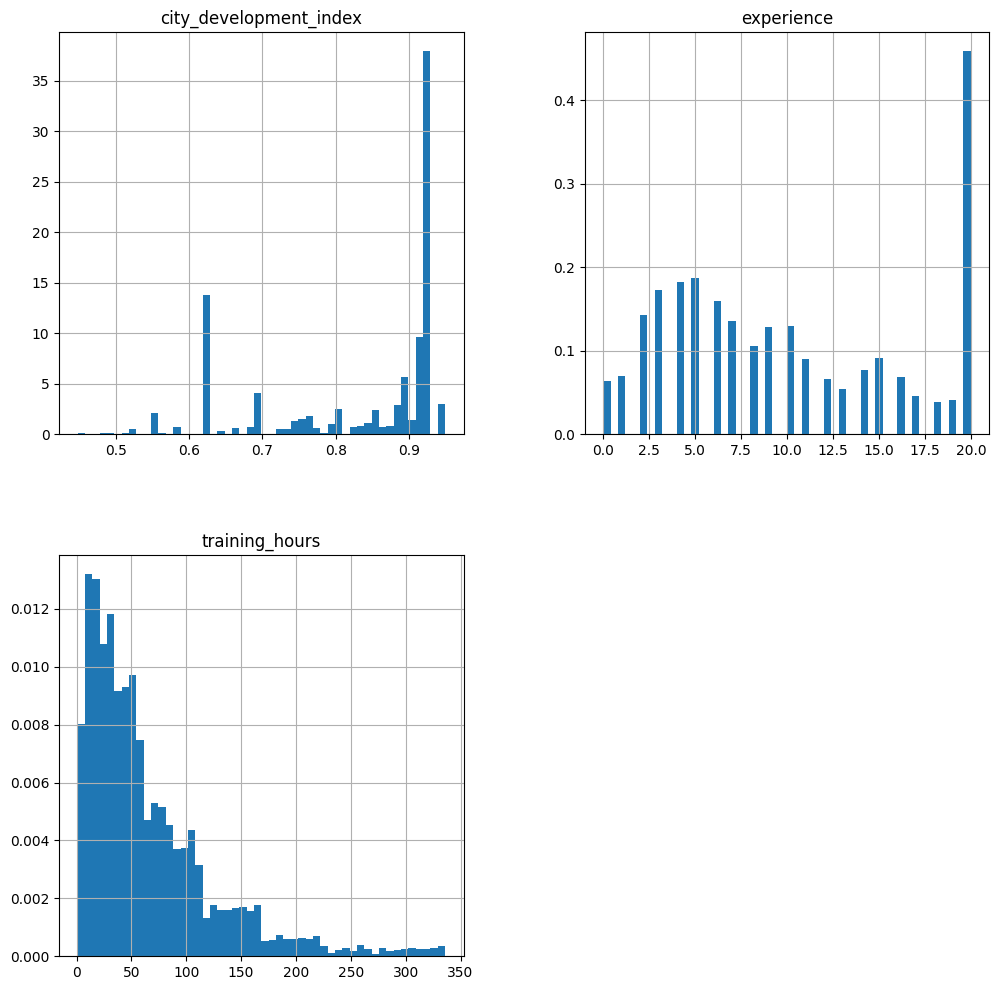

In [75]:
new_df.hist(bins = 50 , density = True,figsize=(12,12))

In [76]:
fig = plt.figure()

<Figure size 640x480 with 0 Axes>

In [77]:
ax = fig.add_subplot(111)

<Axes: >

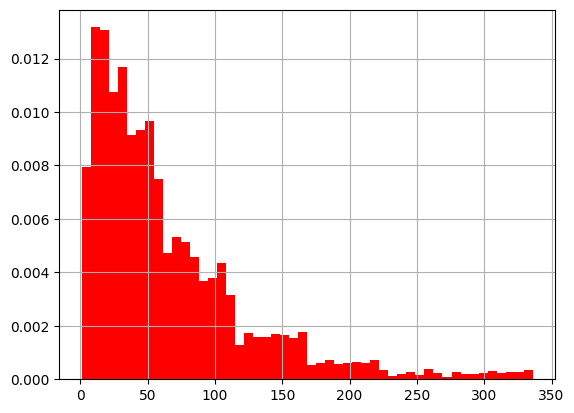

In [78]:
df.training_hours.hist(bins = 50 , density =True, color ='red')

<Axes: >

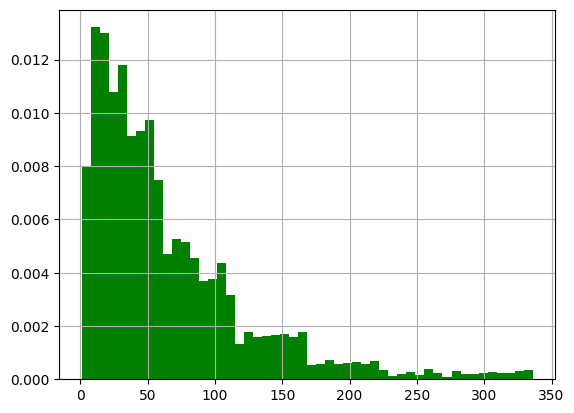

In [79]:
new_df.training_hours.hist(bins = 50 , density =True, color ='green')

<Axes: ylabel='Density'>

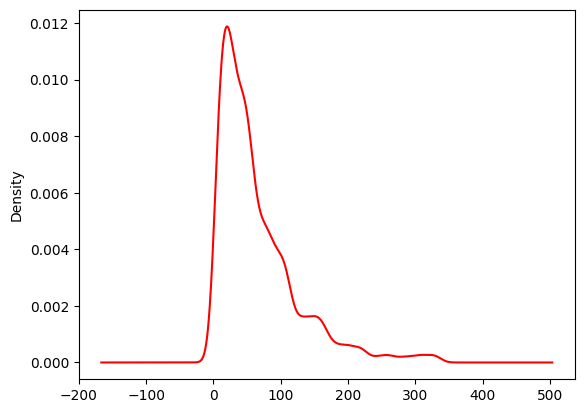

In [80]:
df.training_hours.plot.density(color = 'red')

<Axes: ylabel='Density'>

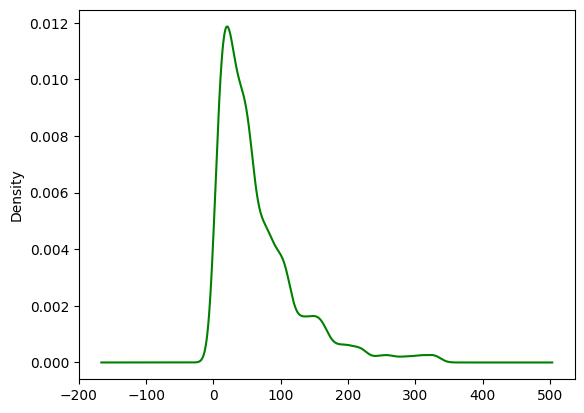

In [81]:
new_df.training_hours.plot.density(color='green')

In [82]:
a = ['city_development_index',
 'experience',
 'training_hours']

In [83]:
new_df

,city_development_index,enrolled_university,education_level,experience,training_hours
0,0.920,no_enrollment,Graduate,20.0,36.0
1,0.776,no_enrollment,Graduate,15.0,47.0
2,0.624,Full time course,Graduate,5.0,83.0
4,0.767,no_enrollment,Masters,20.0,8.0
5,0.764,Part time course,Graduate,11.0,24.0
...,...,...,...,...,...
19153,0.878,no_enrollment,Graduate,14.0,42.0
19154,0.920,no_enrollment,Graduate,14.0,52.0
19155,0.920,no_enrollment,Graduate,20.0,44.0
19156,0.802,no_enrollment,High School,0.0,97.0


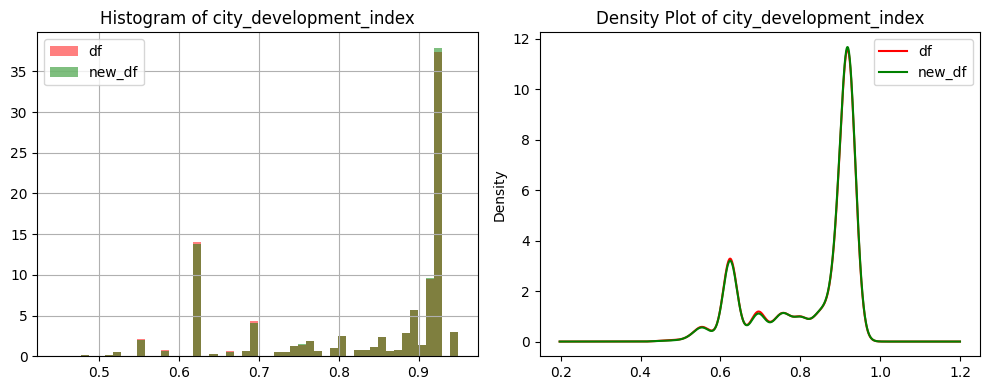

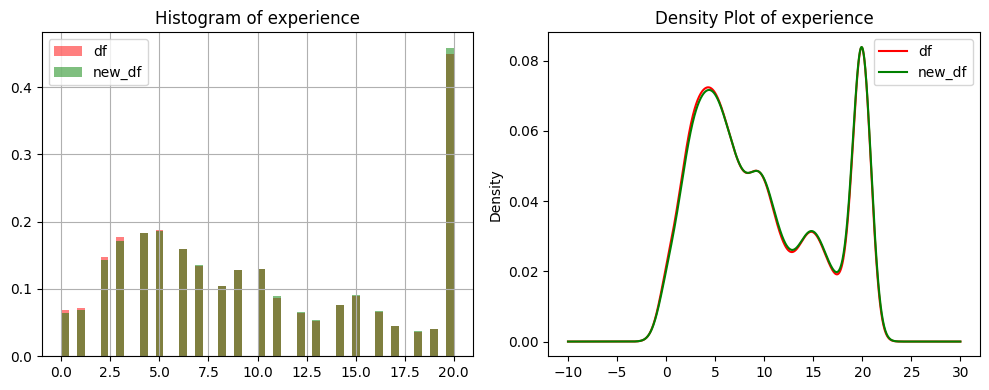

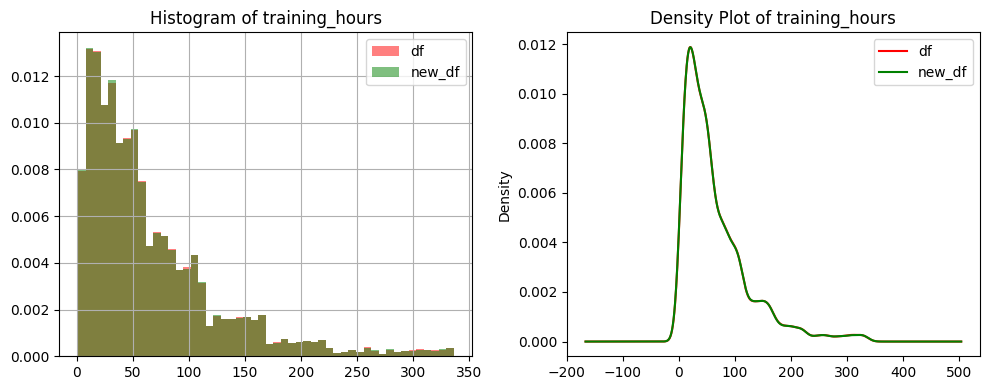

In [84]:
numeric_cols = ['city_development_index', 'experience', 'training_hours']

for col in numeric_cols:
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    df[col].hist(bins=50, density=True, alpha=0.5, label='df', color='red')
    new_df[col].hist(bins=50, density=True, alpha=0.5, label='new_df', color='green')
    plt.title(f'Histogram of {col}')
    plt.legend()

    plt.subplot(1,2,2)
    df[col].plot.density(color='red', label='df')
    new_df[col].plot.density(color='green', label='new_df')
    plt.title(f'Density Plot of {col}')
    plt.legend()
    plt.tight_layout()
    plt.show()

This was all about the numeric columns

Now working on the categorical columns

In [85]:
new_df

,city_development_index,enrolled_university,education_level,experience,training_hours
0,0.920,no_enrollment,Graduate,20.0,36.0
1,0.776,no_enrollment,Graduate,15.0,47.0
2,0.624,Full time course,Graduate,5.0,83.0
4,0.767,no_enrollment,Masters,20.0,8.0
5,0.764,Part time course,Graduate,11.0,24.0
...,...,...,...,...,...
19153,0.878,no_enrollment,Graduate,14.0,42.0
19154,0.920,no_enrollment,Graduate,14.0,52.0
19155,0.920,no_enrollment,Graduate,20.0,44.0
19156,0.802,no_enrollment,High School,0.0,97.0


In [86]:
new_df.enrolled_university.value_counts()

enrolled_university
no_enrollment       12632
Full time course     3449
Part time course     1101
Name: count, dtype: int64

In [87]:
new_df.education_level.value_counts()

education_level
Graduate          10650
Masters            4022
High School        1845
Phd                 380
Primary School      285
Name: count, dtype: int64

In [88]:
df.education_level.value_counts() / len(df)

education_level
Graduate          0.605387
Masters           0.227633
High School       0.105282
Phd               0.021610
Primary School    0.016077
Name: count, dtype: float64

In [89]:
new_df.education_level.value_counts()/len(df)

education_level
Graduate          0.555904
Masters           0.209938
High School       0.096304
Phd               0.019835
Primary School    0.014876
Name: count, dtype: float64

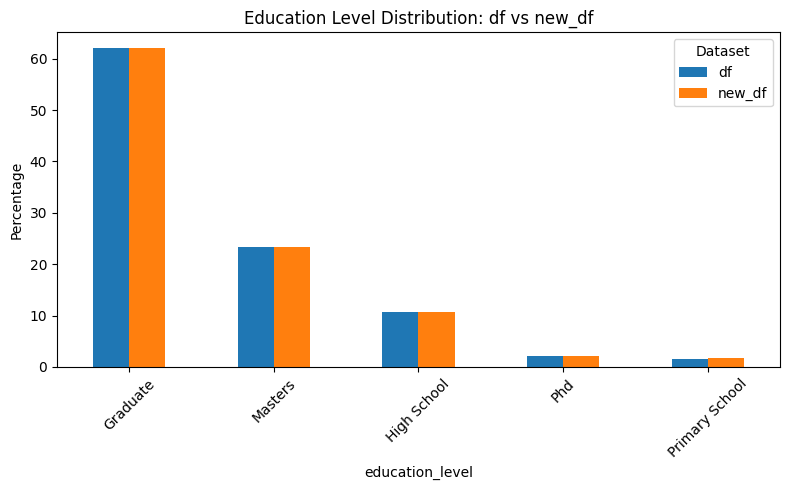

In [91]:
edu_comp = pd.DataFrame({
    'df': df.education_level.value_counts(normalize=True),
    'new_df': new_df.education_level.value_counts(normalize=True)
}).fillna(0)

edu_comp = edu_comp * 100  
edu_comp


edu_comp.plot(kind='bar', figsize=(8,5))
plt.ylabel('Percentage')
plt.title('Education Level Distribution: df vs new_df')
plt.xticks(rotation=45)
plt.legend(title='Dataset')
plt.tight_layout()
plt.show()

As we can see for the education level there is no any considerable difference when we do the CCA.

In [95]:
en_uni = pd.DataFrame({
    'df': df.enrolled_university.value_counts(normalize=True),
    'new_df': new_df.enrolled_university.value_counts(normalize=True)
}).fillna(0)
en_uni



,df,new_df
enrolled_university,,
no_enrollment,0.736043,0.735188
Full time course,0.200139,0.200733
Part time course,0.063818,0.064079


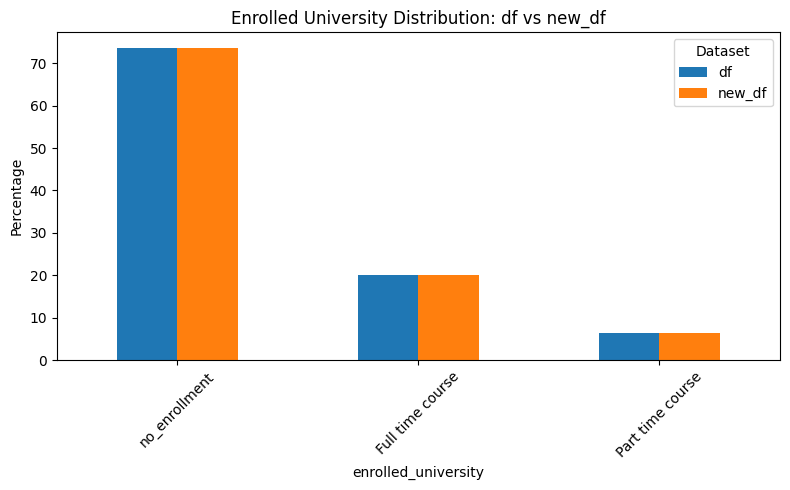

In [ ]:
en_uni = en_uni * 100  

en_uni.plot(kind='bar', figsize=(8,5))
plt.ylabel('Percentage')
plt.title('Enrolled University Distribution: df vs new_df')
plt.xticks(rotation=45)
plt.legend(title='Dataset')
plt.tight_layout()
plt.show()